In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [25]:
df=pd.read_csv("Mall_Customers.csv")
df.drop(columns="CustomerID",inplace=True)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [26]:
label=LabelEncoder()
for i in df.select_dtypes(include='object'):
    df[i]=label.fit_transform(df[i])
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [27]:
X=df

In [28]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(X)
x_scalar

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [29]:
model=DBSCAN(eps=0.5,min_samples=10)
label=model.fit_predict(x_scalar)
label


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

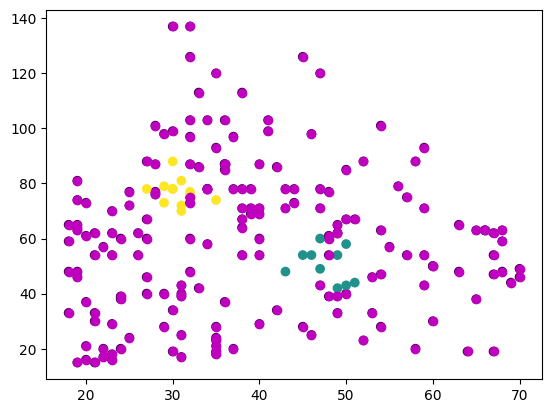

In [30]:
plt.scatter(X["Age"],X["Annual Income (k$)"],c=label)
outlier=X[label==-1]
plt.scatter(outlier["Age"],outlier["Annual Income (k$)"],color="m")
plt.show()

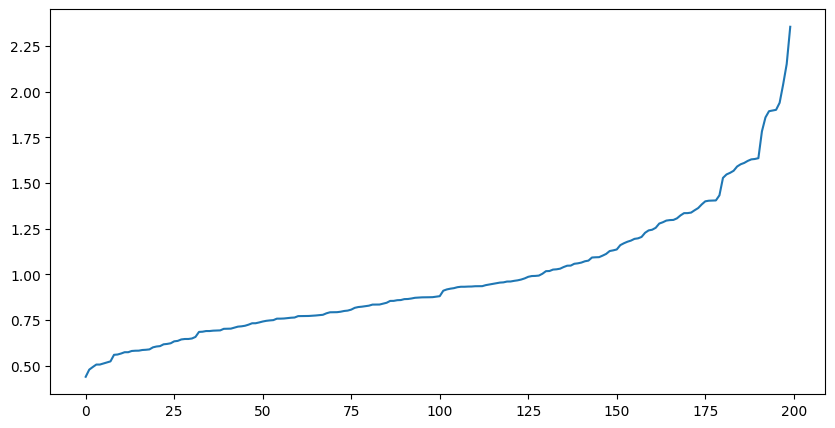

In [31]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
neighbour=NearestNeighbors(n_neighbors=10)
neighbour_fit=neighbour.fit(x_scalar)
distances,indices=neighbour_fit.kneighbors(x_scalar)
distances=np.sort(distances[:,9])
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.show()